In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, confusion_matrix, classification_report, recall_score, f1_score, accuracy_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

In [14]:
data = pd.read_csv('data/notebook-01.csv')
data.head()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,...,Ocean_Name_Atlantic,Ocean_Name_Indian,Ocean_Name_Pacific,Ocean_Name_Red Sea,Exposure_Exposed,Exposure_Sheltered,Exposure_Sometimes,Term_Type_El Niño,Term_Type_La Niña,Term_Type_Neutral
0,2501,10324336,23.163,-82.5260,8519.23,0.0287,49.90,15,9,2005,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3467,10324754,-17.575,-149.7833,1431.62,0.0262,51.20,15,3,1991,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1794,10323866,18.369,-64.5640,182.33,0.0429,61.52,15,1,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8647,10328028,17.760,-64.5680,313.13,0.0424,65.39,15,4,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,8648,10328029,17.769,-64.5830,792.00,0.0424,65.39,15,4,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
data.isnull().sum()

Site_ID                                  0
Sample_ID                                0
Latitude_Degrees                         0
Longitude_Degrees                        0
Distance_to_Shore                        0
Turbidity                                0
Cyclone_Frequency                        0
Date_Day                                 0
Date_Month                               0
Date_Year                                0
Depth_m                                  0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Freque

In [25]:
imp_cols = data[['Latitude_Degrees',                       
'Longitude_Degrees',
'SSTA_Standard_Deviation',
'Date_Year',  
'Depth_m',                     
'Distance_to_Shore',  
'TSA_DHW',  
'ClimSST',                                                  
'Percent_Bleaching'	 'Bleached']]

In [26]:
imp_cols.head()

,Longitude_Degrees,SSTA_Standard_Deviation,Latitude_Degrees,Depth_m,Date_Year,Bleached,Percent_Bleaching
0,-82.5260,1.0,23.163,10.00,2005,1,50.2
1,-149.7833,1.0,-17.575,14.00,1991,1,50.7
2,-64.5640,1.0,18.369,7.00,2006,1,50.9
3,-64.5680,1.0,17.760,9.02,2006,1,50.9
4,-64.5830,1.0,17.769,12.50,2006,1,50.9


In [27]:
imp_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32678 entries, 0 to 32677
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Longitude_Degrees        32678 non-null  float64
 1   SSTA_Standard_Deviation  32678 non-null  float64
 2   Latitude_Degrees         32678 non-null  float64
 3   Depth_m                  32678 non-null  float64
 4   Date_Year                32678 non-null  int64  
 5   Bleached                 32678 non-null  int64  
 6   Percent_Bleaching        32678 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.7 MB


In [28]:
imp_cols = imp_cols.drop_duplicates(keep='last')

In [29]:
X = imp_cols.drop(columns=['Bleached', 'Percent_Bleaching'])
y = imp_cols['Bleached']

In [30]:
print(X.shape)
print(y.shape)

(20957, 5)
(20957,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<Figure size 1200x800 with 0 Axes>

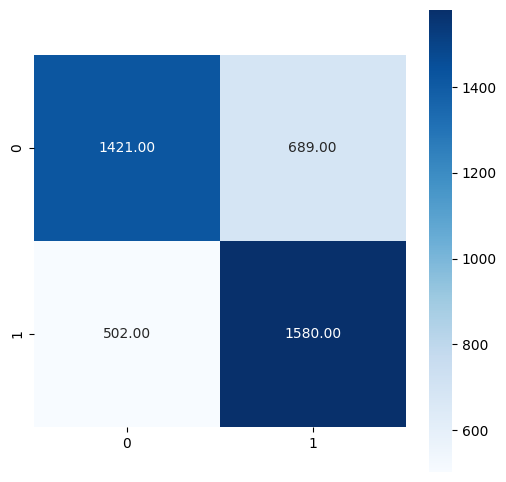

Train Accuracy of Logistic Regression: 0.7089
Test Accuracy of Logistic Regression: 0.7159
[0.6963420008814456, 0.7588856868395774, 0.7262698230291886]
---


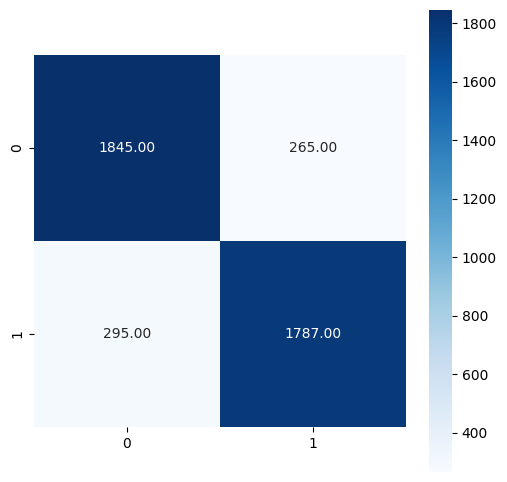

Train Accuracy of Random Forest: 0.9905
Test Accuracy of Random Forest: 0.8664
[0.8708576998050682, 0.8583093179634966, 0.864537977745525]
---


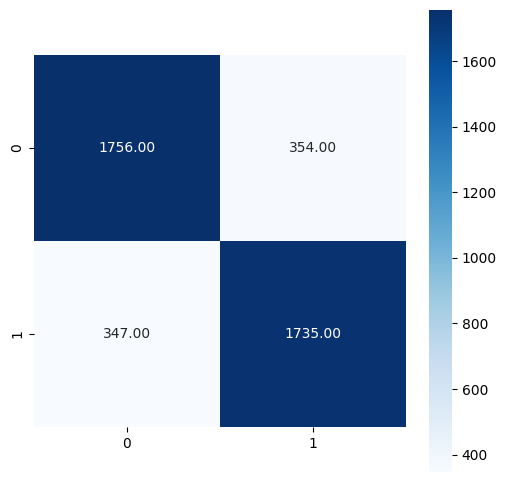

Train Accuracy of Decision Tree: 0.9905
Test Accuracy of Decision Tree: 0.8328
[0.8305409286740068, 0.8333333333333334, 0.8319347878206665]
---


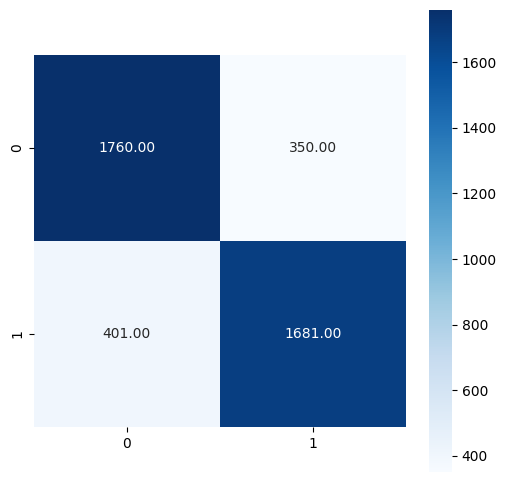

Train Accuracy of K Nearest Neighbours: 0.8778
Test Accuracy of K Nearest Neighbours: 0.8208
[0.82767109798129, 0.8073967339097022, 0.8174082178458546]
---


In [ ]:
if isinstance(X, np.ndarray):
    # If X is a NumPy array, create a DataFrame with placeholder column names
    # Replace 'feature_1', 'feature_2', ... with your actual feature names
    X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbours': KNeighborsClassifier()
}

# Train models and calculate accuracy and ROC curve
plt.figure(figsize=(12, 8))

train_accuracies = []
test_accuracies = []
model_names = []
# metrics = []
# cmatrices = []


feature_importance_df = pd.DataFrame(index=X.columns)

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on training set
    y_train_pred = model.predict(X_train)
    
    # Make predictions on test set
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy on training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision_ = precision_score(y_test, y_test_pred)
    recall_ = recall_score(y_test, y_test_pred)
    f1_ = f1_score(y_test, y_test_pred)
    cm_ = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm_, annot=True, cmap="Blues", fmt=".2f", square=True)
    plt.show()
    # plt.xlabel("Predicted Labels")
    # plt.ylabel("True Labels")
    # plt.title("Confusion Matrix")
    # plt.show()
    
    print(f'Train Accuracy of {model_name}: {train_accuracy:.4f}')
    print(f'Test Accuracy of {model_name}: {test_accuracy:.4f}')
    
    model_names.append(model_name)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print([precision_, recall_, f1_])
    print('---')
    


In [ ]:

if isinstance(X, np.ndarray):
    # If X is a NumPy array, create a DataFrame with placeholder column names
    # Replace 'feature_1', 'feature_2', ... with your actual feature names
    X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbours': KNeighborsClassifier()
}

# Train models and calculate accuracy and ROC curve
plt.figure(figsize=(12, 8))

train_accuracies = []
test_accuracies = []
model_names = []


feature_importance_df = pd.DataFrame(index=X.columns)

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on training set
    y_train_pred = model.predict(X_train)
    
    # Make predictions on test set
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy on training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'Train Accuracy of {model_name}: {train_accuracy:.4f}')
    print(f'Test Accuracy of {model_name}: {test_accuracy:.4f}')
    
    model_names.append(model_name)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Calculate ROC curve on test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Plot ROC curve for test set
    plt.plot(fpr_test, tpr_test, label=f'{model_name} Test (AUC = {roc_auc_test:.2f})', linewidth=3)
    
    # Calculate ROC curve on training set
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Get feature importances for models that support it
    if model_name in ['Random Forest', 'Decision Tree']:
        importances = model.feature_importances_
        feature_importance_df[model_name] = importances
    
    # Plot ROC curve for training set
    # plt.plot(fpr_train, tpr_train, linestyle='--', label=f'{model_name} Train (AUC = {roc_auc_train:.2f})')

# Plot settings for ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=25, weight = 'bold')
plt.ylabel('True Positive Rate', fontsize=25, weight = 'bold' )
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20, weight = 'bold')
plt.legend(loc="lower right", fontsize=18)
plt.show()


# Plot feature importances
if not feature_importance_df.empty:
    feature_importance_df['Mean Importance'] = feature_importance_df.mean(axis=1)
    feature_importance_df = feature_importance_df.sort_values(by='Mean Importance', ascending=False)
    feature_importance_df = feature_importance_df.iloc[:10]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Mean Importance', y=feature_importance_df.index, data=feature_importance_df)
    plt.title('Feature Importance', fontsize = 16)
    plt.xlabel('Mean Importance', fontsize = 16)
    plt.ylabel('Feature', fontsize = 16)
    plt.show()